<a href="https://colab.research.google.com/github/jiiwon129/ESAA/blob/main/OB/%EA%B3%BC%EC%A0%9C/WEEK02/ESAA_OB_WEEK02_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 7 앙상블 학습과 랜덤 포레스트**

### **[개념 정리]**

#### **7.1 투표 기반 분류기**

직접 투표(Hard voting) 분류기

: 각 분류기의 예측을 모아서 가장 많이 선택된 클래스를 예측하는 것 (다수결 투표)
- 각 분류기가 약한 학습기(weak learner)일지라도 충분히 많고 다양하다면 앙상블은 높은 정확도를 내는 강한 학습기(strong learner)가 될 수 있음

---

앙상블
- 예측기가 가능한 한 서로 독립적일 떄 최고의 성능 발휘
- 다양한 분류기를 얻는 방법 중 한 가지: 각기 다른 알고리즘으로 학습시키는 것

  --> 매우 다른 종류의 오차를 만들 가능성이 높기 때문에 앙상블 모델의 정확도를 향상시킴
  
---

간접 투표(Soft voting)

: 모든 분류기가 클래스의 확률을 예측할 수 있으면, 개별 분류기의 예측을 평균 내어 확률이 가장 높은 클래스를 예측 가능

--> 분류기에 predict_proba() 메서드가 존재할 시!

- 확률이 높은 투표에 비중을 더 두기 떄문에 직접 투표 방식보다 성능이 높음

1. voting='soft' 설정
2. 모든 분류기가 클래스의 확률을 추정할 수 있어야함
- SVC의 경우, 기본값에서는 클래스 확률을 제공하지 않음 --> `probability = True` 지정

#### **7.2 배깅과 페이스팅**

배깅(Bagging: Bootstrap Aggregating)

: 같은 알고리즘을 사용하고 훈련 세트의 서브셋을 무작위로 구성하여 분류기를 각기 다르게 학습

페이스팅(Pasting)

: 중복을 허용하지 않고 샘플링하는 방식

---

수집 함수
1. 분류 문제일 경우 --> 통계적 최빈값(mode)
2. 회귀 문제일 경우 --> 평균

- 개별 예측기는 원본 훈련 세트로 훈련시킨 것보다 훨씬 크게 편향되어 있음 --> 수집 함수 통과 시, 편향과 분산이 모두 감소
- 일반적으로 앙상블의 결과 --> 원본 데이터셋으로 하나의 예측기를 훈련시킬 때와 비교해 편향은 비슷, 분산은 감소

##### **7.2.1 사이킷런의 배깅과 페이스팅**

```
from sklearn.ensemble import BaggingClassifier
```

- BaggingClassifier는 클래스 확률을 추정할 수 있는 분류기를 기반으로 하면, 직접 투표(Hard Voting) 대신 간접 투표 방식(Soft Voting)을 사용

- 앙상블은 비슷한 편향에서 더 작은 분산을 만듦

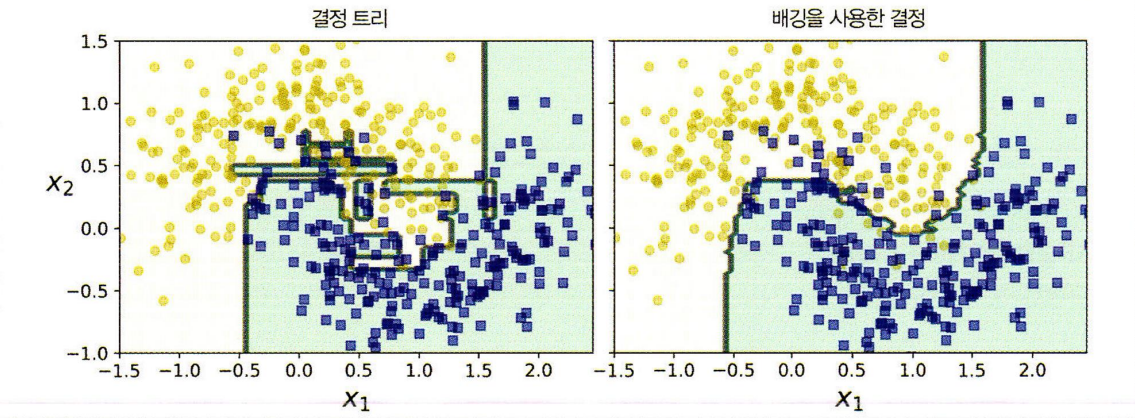

- 단일 결정 트리와 500개 트리로 만든 배깅 앙상블 비교 이미지

##### **7.2.2 oob 평가**

BaggingClassifier는 기본값으로 중복을 허용(bootstrap=True) 훈련 세트의 크기만큼인 m개 샘플을 선택
- 앙상블의 평가는 각 예측기의 oob 평가를 평균하여 얻음

--> `BaggingClassifier(oob_score=True`: 훈련이 끝난 후 자동으로 oob 평가 수행
  - 평가 점수 결과는 `oob_score_` 변수에 저장

`oob_decision_function_`: 각 훈련 샘플의 클래스 확률을 반환하는 결정 함수
- 기반이 되는 예측기가 predict_probe() 메서드를 가지고 있기 때문!

#### **7.3 랜덤 패치와 랜덤 서브스페이스**

BaggingClassifier 특성 샘플링 지원
- max_features
- bootstrap_features

--> 작동 방식은 max_sampeles, bootstrap과 동일
  - 하지만, 샘플이 아닌 **특성에 대한 샘플링**

- 매우 고차원 데이터셋을 다룰 때 유용!

랜덤 패치 방식(Random Patches method)
- 훈련 특성과 샘플을 모두 샘플링하는 것

랜덤 서브스페이스(Random Subspaces method)
- 훈련 샘플을 모두 사용 (bootstrap=False, max_samples=1.0)
- 특성은 샘플링 (bootstrap_features=True, max_features<1.0)

---

특성 샘플링은 더 다양한 예측기를 만들며 편향을 늘리는 대신 분산을 감소시킴

#### **7.4 랜덤 포레스트**

랜덤 포레스트

: 일반적으로 배깅 또는 페이스팅 방법을 적용한 결정 트리의 앙상블

- `max_samples`: 훈련 세트의 크기

##### **7.4.1 엑스트라 트리**

익스트림 랜덤 트리(Extremely randomized trees) 앙상블 또는 엑스트라 트리(extra-trees)

: 극단적으로 무작위한 트리의 랜덤 포레스트

- 일반 랜덤 포레스트보다 엑스트라 트리의 속도가 빠름

  --> 모든 노드에서 특성마다 가장 최적의 임곗값을 찾는 것이 트리 알고리즘에서 가장 시간이 많이 소요되는 작업 중 하나이기 때문

---

RandomForestClassifier가 ExtraTreesClassifier보다 나을지, 나쁠지 알기 어려움
- 둘 다 시도해본 후, 교차 검증으로 비교해보는 것도 방법

#### **7.4.2 특성 중요도**

랜덤 포레스트의 장점
- 특성의 상대적 중요도 측정이 쉬움

--> 랜덤 포레스트에 있는 모든 트리에 걸쳐서 어떤 특성을 사용한 노드가 평균적으로 불순도를 얼마나 감소시키는지 확인하여 특성의 중요도 측정
  - `feature_importances_`

- 특성을 선택해야 할 때 어떤 특성이 중요한지 빠르게 확인 가능

### **[필사]**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# import package
import numpy as np
import os

# 5장에서의 moons dataset 불러오기
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y = make_moons(n_samples=100, noise=0.15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### **7.1 투표 기반 분류기**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard'
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [ ]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9
RandomForestClassifier 0.95
SVC 0.95
VotingClassifier 0.95


#### **7.2 배깅과 페이스팅**

##### **7.2.1 사이킷런의 배깅과 페이스팅**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=50, bootstrap=True, n_jobs=-1
)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

##### **7.2.2 oob 평가**

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True
)

bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.95

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.95

In [ ]:
bag_clf.oob_decision_function_

array([[0.40571429, 0.59428571],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.87931034, 0.12068966],
       [0.72972973, 0.27027027],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.875     , 0.125     ],
       [0.88829787, 0.11170213],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.96089385, 0.03910615],
       [0.87349398, 0.12650602],
       [0.90322581, 0.09677419],
       [0.99411765, 0.00588235],
       [0.88586957, 0.11413043],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.92655367, 0.07344633],
       [0.22994652, 0.77005348],
       [0.        , 1.        ],
       [0.01604278, 0.98395722],
       [0.        , 1.        ],
       [0.69230769, 0.30769231],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.

#### **7.3 랜덤 패치와 랜덤 서브스페이스**

#### **7.4 랜덤 포레스트**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features="auto", max_leaf_nodes=16),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1
)

##### **7.4.1 엑스트라 트리**

#### **7.4.2 특성 중요도**

In [ ]:
from sklearn.datasets import load_iris
iris =load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
  print(name, score)

sepal length (cm) 0.09835441567368756
sepal width (cm) 0.021542489912976533
petal length (cm) 0.4069485995501447
petal width (cm) 0.47315449486319117
